In [1]:
### automatically refresh the buffer

%load_ext autoreload
%autoreload 2

### solve the auto-complete issue

%config Completer.use_jedi = False

### lvl 1 setups

import sys
sys.path.append('/portal1/dell/GitHub/WAYS')
sys.path.append('/portal1/dell/GitHub/sanctuary')

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

### lvl 2 setups (systerm)

import os
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib as mpl
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
from numpy import hstack
from matplotlib import pyplot
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import warnings
warnings.filterwarnings('ignore')

In [2]:
from numpy import polyfit, poly1d
from stats import cr
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [3]:
import os
import glob
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from stats import cr
from gistool import basemap, stack_image, stack_shp, stack_hatch, stack_shp_cn, ncslice
from spatial import upscale
import statsmodels.formula.api as smf
from scipy.stats.mstats import theilslopes
from scipy.stats import kendalltau
import cartopy.crs as ccrs

import pandas as pd
import scipy.stats as scs
import matplotlib.pyplot as plt

import climate_indices as indices
from climate_indices import compute
from climate_indices import utils, indices

In [4]:
from pylab import *
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
clist1 =['#ffffff','#f8ad9d','#3a20f0']
red1 = LinearSegmentedColormap.from_list('chaos',clist1)
clist2 =['#fffdf7','#99d6ea','#6798c0','#f0a7a0','#f26ca7']
cmap2 = LinearSegmentedColormap.from_list('chaos',clist2)
clist4 =['#fffdf7','#99d6ea','#6798c0','#f0a7a0','#f26ca7','#a019a6']
cmap4 = LinearSegmentedColormap.from_list('chaos',clist4)
clist5=['#035a96','#1079c3','#3d9fee','#ffffff','#ff6d6d','#f26ca7','#920efc']
cmap5 = LinearSegmentedColormap.from_list('chaos',clist5)

In [5]:
shp='/portal3/gis/LMRB_Boundary/Lancang_Mekong_Basin/Lancang_Mekong_Basin.shp'
dsp = xr.open_dataset('/home/wang-k/main/MLdrought/weekly_data/prec_weekly_lmrb.nc')
dspet = xr.open_dataset('/home/wang-k/main/MLdrought/weekly_data/pet_weekly_lmrb_penman.nc')

In [6]:
## choose prec wet season
dsp_wet=dsp.sel(time=((dsp.time.dt.month == 5) | (dsp.time.dt.month == 6) |
                      (dsp.time.dt.month == 7) | (dsp.time.dt.month == 8) |
                      (dsp.time.dt.month == 9) | (dsp.time.dt.month == 10)))

## choose prec dry season
dsp_dry=dsp.sel(time=((dsp.time.dt.month == 1) | (dsp.time.dt.month == 2) |
                      (dsp.time.dt.month == 3) | (dsp.time.dt.month == 4) |
                      (dsp.time.dt.month == 11) | (dsp.time.dt.month == 12)))

In [7]:
## choose pet wet season
dspet_wet=dspet.sel(time=((dspet.time.dt.month == 5) | (dspet.time.dt.month == 6) |
                      (dspet.time.dt.month == 7) | (dspet.time.dt.month == 8) |
                      (dspet.time.dt.month == 9) | (dspet.time.dt.month == 10)))

## choose pet dry season
dspet_dry=dspet.sel(time=((dspet.time.dt.month == 1) | (dspet.time.dt.month == 2) |
                      (dspet.time.dt.month == 3) | (dspet.time.dt.month == 4) |
                      (dspet.time.dt.month == 11) | (dspet.time.dt.month == 12)))

In [34]:
def replace_negative_with_zero(arr):
    return np.maximum(arr, 0)
    
dspwet_data = replace_negative_with_zero(dsp_wet.tp.values)
dspdry_data = replace_negative_with_zero(dsp_dry.tp.values)
petwet_data = dspet_wet.pev.values
petdry_data = dspet_dry.pev.values

# SPEI in dry and wet season weekly

In [35]:
# using climate indices package calculate SPEI wet season
import climate_indices as indices
from climate_indices import compute
from climate_indices import utils, indices
spei_w = np.empty((1638, 102, 61))
for i in range(0,102):
    for j in range(0,61):
        speiw = indices.spei(precips_mm=dspwet_data[:,i,j],
                            pet_mm=petwet_data[:,i,j],
                            scale=1,
                            distribution=indices.Distribution.gamma,
                            periodicity=compute.Periodicity.daily,
                            data_start_year=1960,
                            calibration_year_initial=1960,
                            calibration_year_final=2022)
        spei_w[:, i, j] = speiw

In [36]:
# using climate indices package calculate SPEI wet season
import climate_indices as indices
from climate_indices import compute
from climate_indices import utils, indices
spei_d = np.empty((1638, 102, 61))
for i in range(0,102):
    for j in range(0,61):
        speid = indices.spei(precips_mm=dspdry_data[:,i,j],
                            pet_mm=petdry_data[:,i,j],
                            scale=1,
                            distribution=indices.Distribution.gamma,
                            periodicity=compute.Periodicity.daily,
                            data_start_year=1960,
                            calibration_year_initial=1960,
                            calibration_year_final=2022)
        spei_d[:, i, j] = speid

In [37]:
ds_dryspei = xr.Dataset({'spei': (['time', 'lat', 'lon'], spei_d)},
                    coords={'lon': (['lon'], dspet_dry.lon.values),
                            'lat': (['lat'], dspet_dry.lat.values),
                            'time': ('time', dspet_dry.time.values)})

ds_wetspei = xr.Dataset({'spei': (['time', 'lat', 'lon'], spei_w)},
                    coords={'lon': (['lon'], dspet_wet.lon.values),
                            'lat': (['lat'], dspet_wet.lat.values),
                            'time': ('time', dspet_wet.time.values)})

ds_spei = xr.merge([ds_dryspei,ds_wetspei])

# here#################################

# Flash Drought (SPEI < -1.28 & ΔSPEI < -2 within four weeks)

### flash drought in dry season

In [38]:
dryfd = []

for m in range(63):
    start_idx = m * 26
    end_idx = (m + 1) * 26
    for i in range(0, 102):
        for j in range(0, 61): 
            array = spei_d[:, i, j]
            b = []
            k = start_idx
            if np.isnan(array[0]):
                dryfd.append(np.tile(np.nan, 26))
            else:    
                while k < end_idx:
                    for n in range(1, 5):
                        if k >= n and array[k] <= -1.28 and array[k] - array[k - n] <= -2:
                            b.append(array[k])
                            k += 1
                            break
                    else:
                        b.append(np.nan)
                        k += 1
                        continue

                    for a in range(k, end_idx):
                        if array[a] < -1.28:
                            b.append(array[a])
                            k += 1
                        else:
                            break

                dryfd.append(b)
dryfd = np.array(dryfd).reshape(63,102,61,26)
dryfd = dryfd.transpose(0,3,1,2)

### flash drought in wet season

In [39]:
wetfd = []

for m in range(63):
    start_idx = m * 26
    end_idx = (m + 1) * 26
    for i in range(0, 102):
        for j in range(0, 61): 
            array = spei_w[:, i, j]
            b = []
            k = start_idx
            if np.isnan(array[0]):
                wetfd.append(np.tile(np.nan, 26))
            else:    
                while k < end_idx:
                    for n in range(1, 5):
                        if k >= n and array[k] <= -1.28 and array[k] - array[k - n] <= -2:
                            b.append(array[k])
                            k += 1
                            break
                    else:
                        b.append(np.nan)
                        k += 1
                        continue

                    for a in range(k, end_idx):
                        if array[a] < -1.28:
                            b.append(array[a])
                            k += 1
                        else:
                            break

                wetfd.append(b)
wetfd = np.array(wetfd).reshape(63,102,61,26)
wetfd = wetfd.transpose(0,3,1,2)


In [40]:
ds_dryfd = xr.Dataset({'spei': (['time', 'lat', 'lon'], dryfd.reshape(1638,102,61))},
                    coords={'lon': (['lon'], dspet_dry.lon.values),
                            'lat': (['lat'], dspet_dry.lat.values),
                            'time': ('time', dspet_dry.time.values)})

ds_wetfd = xr.Dataset({'spei': (['time', 'lat', 'lon'], wetfd.reshape(1638,102,61))},
                    coords={'lon': (['lon'], dspet_wet.lon.values),
                            'lat': (['lat'], dspet_wet.lat.values),
                            'time': ('time', dspet_wet.time.values)})

ds_annualfd = xr.merge([ds_dryfd,ds_wetfd])

# atmospheric circulation background of early meteorological conditions on flash droughts onsetlag

In [41]:
from SOM_ import SOM as mySOM

## Select the onset days and every single grid point that occored flash drought

In [42]:
arr = dryfd.reshape(1638,102,61)
dry_on = np.empty((1638,102,61))
for i in range(102):
    for j in range(61):
        array = arr[:,i,j]
        dry_on[:,i,j] = (np.where(np.isnan(np.roll(array, 1)), array, np.nan))
dry_on[np.isnan(dry_on)==False]=1

In [43]:
arr = wetfd.reshape(1638,102,61)
wet_on = np.empty((1638,102,61))
for i in range(102):
    for j in range(61):
        array = arr[:,i,j]
        wet_on[:,i,j] = (np.where(np.isnan(np.roll(array, 1)), array, np.nan))
wet_on[np.isnan(wet_on)==False]=1

In [44]:
ds_dryon = xr.Dataset({'onset': (['time', 'lat', 'lon'], dry_on)},
                    coords={'lon': (['lon'], dspet_dry.lon.values),
                            'lat': (['lat'], dspet_dry.lat.values),
                            'time': ('time', dspet_dry.time.values)})

ds_weton = xr.Dataset({'onset': (['time', 'lat', 'lon'], wet_on)},
                    coords={'lon': (['lon'], dspet_wet.lon.values),
                            'lat': (['lat'], dspet_wet.lat.values),
                            'time': ('time', dspet_wet.time.values)})

ds_onset = xr.merge([ds_dryon,ds_weton])

In [45]:
onset = ds_onset.onset.values
spei = ds_spei.spei.values
indices_to_keep = np.where(np.nanmean(onset,axis=(1,2)) == 1)[0]
spei_SOM = spei[indices_to_keep]
spei_SOM = spei_SOM.reshape(2963,6222)
spei_SOM = spei_SOM[~np.isnan(spei_SOM)]
spei_SOM = spei_SOM.reshape(2963,1336)

## self organize map cluster

In [46]:
c = []
iner = []
for k in range(0,13):
    num = k+1
    som = mySOM(m=num, n=1, dim=1336)
    som.fit(spei_SOM)
    predictions = som.predict(spei_SOM)
    cluster = predictions
    names = locals()
    for i in range(0,num):
        names['spei_SOM'+str(i)]=[]
        names['index'+str(i)] = np.argwhere(cluster==i)
        names['index'+str(i)] = names['index'+str(i)].reshape(names['index'+str(i)].shape[0])
        for j in range(0,names['index'+str(i)].shape[0]):
            names['spei_SOM'+str(i)] = np.append(names['spei_SOM'+str(i)],spei_SOM[names['index'+str(i)][j]])
        names['spei_SOM'+str(i)] = np.array(names['spei_SOM'+str(i)]).reshape(names['index'+str(i)].shape[0],1336)




    spei_som_ = []
    for i in range(0,num):
        spei_som_ = np.append(spei_som_,np.nanmean(names['spei_SOM'+str(i)],axis=0))
    spei_som_.reshape(num,1336).shape
    som._find_bmu(spei_som_.reshape(num,1336))
    print(som._inertia_/1000000)



    #fig = plt.figure(figsize=(8, 3), dpi=300)
    #plt.imshow(np.nanmean(gph5000,axis=0),vmax=5800,vmin=5400,cmap='plasma')
    #plt.colorbar()
    c.append(k+1)
    iner.append(som._inertia_/1000000)

3.9456528374020987
3.3876789928864364
3.049337737745272
2.889861218521528
2.7633128551413875
2.667007988223587
2.538016807448227
2.519957617335905
2.4749740899239874
2.423671135243588
2.413197086138637
2.366776777458936
2.327133122566579


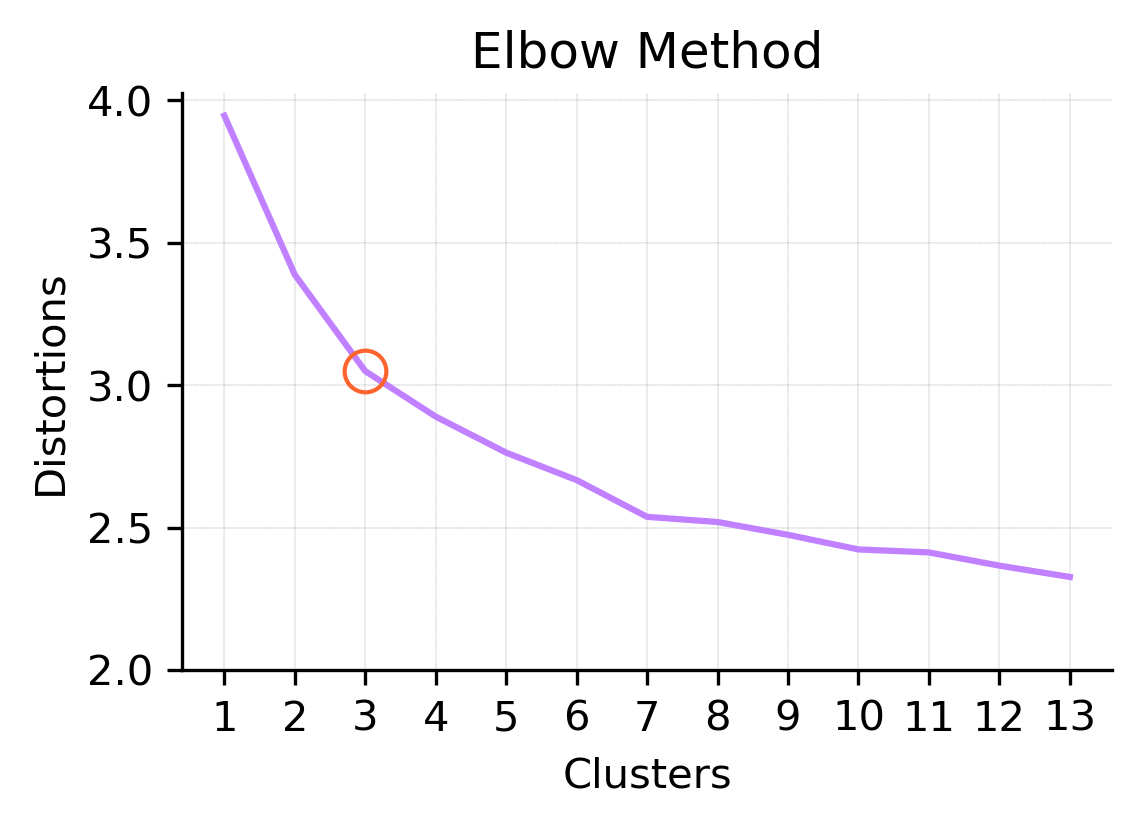

In [47]:
fig, ax = plt.subplots(figsize=[4,2.5],dpi=300)
ax.plot(c, iner,c='#c080ff')
ax.set_title('Elbow Method')
ax.set_xlabel('Clusters')
ax.set_ylabel('Distortions')

ax.plot(c[2], iner[2], marker='o', markersize=10, color='#fe642e', fillstyle='none')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xticks(c)
ax.set_yticks([2, 2.5, 3, 3.5, 4])

ax.grid(ls='--',lw=0.1,alpha=0.5,color='k')
plt.show()

In [48]:
num = 3
som = mySOM(m=num, n=1, dim=1336)
som.fit(spei_SOM)
predictions = som.predict(spei_SOM)

In [49]:
weeks = np.arange(0,3276)
onset_week = np.nanmean(onset,axis=(1,2))

pred_result = []
index_arr2 = 0

for item in onset_week:
    if np.isnan(item):
        pred_result.append(np.nan)
    else:
        pred_result.append(predictions[index_arr2])
        index_arr2 += 1

In [50]:
spei.shape

(3276, 102, 61)

In [51]:
df = pd.DataFrame({'weeks': weeks, 
                   'onset_week': onset_week, 
                   'pred_result': pred_result})
df.to_csv('cluster_fd.csv', index=False)

names = locals()
for i in range(0,num):
    names['spei'+str(i)] = spei[np.array(pred_result) == i]

In [52]:
df

,weeks,onset_week,pred_result
0,0,NaN,NaN
1,1,NaN,NaN
2,2,1.0,0.0
3,3,NaN,NaN
4,4,1.0,0.0
...,...,...,...
3271,3271,NaN,NaN
3272,3272,NaN,NaN
3273,3273,1.0,2.0
3274,3274,1.0,1.0


In [53]:
spei2.shape

(1265, 102, 61)

# Cluster result

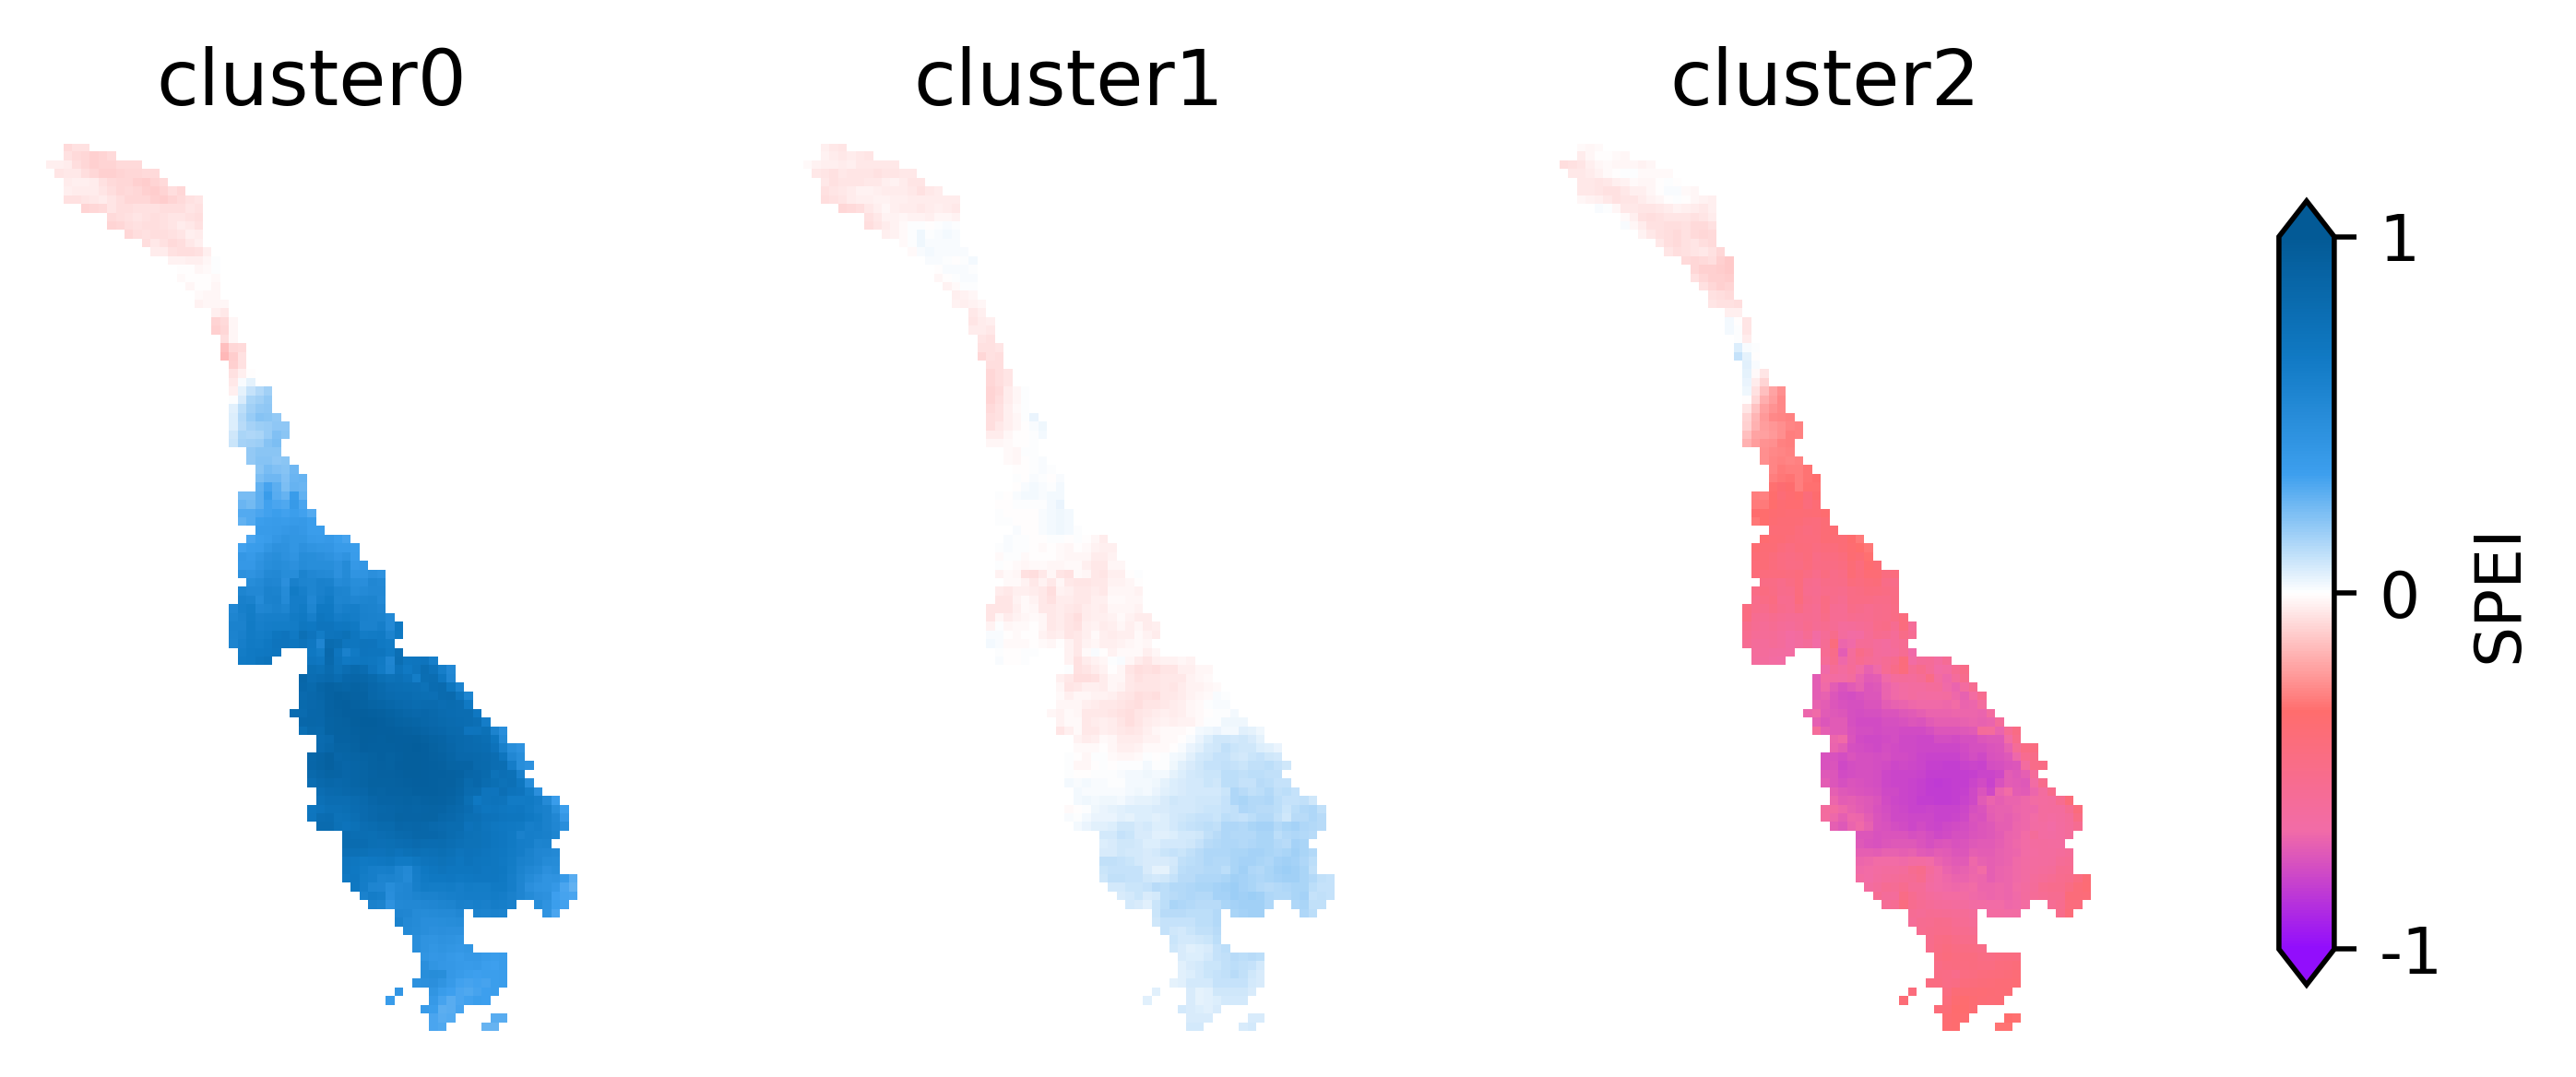

In [54]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(6, 2.5), dpi=500)
images = []

namessperc_on = ['cluster0', 'cluster1', 'cluster2',]
cluster_speifd = [np.nanmean(spei0,axis=0),np.nanmean(spei1,axis=0),np.nanmean(spei2,axis=0),]

for i, (qt, subplot, name) in enumerate(zip(cluster_speifd, ax.flat, namessperc_on)):
    im = subplot.imshow(qt, cmap=cmap5.reversed(), interpolation='nearest',vmin=-1,vmax=1)
    images.append(im)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_frame_on(False)
    ax[-1,].axis('off')
    subplot.set_title(name)

cax = fig.add_axes([0.95, 0.15, 0.02, 0.68])
cbar = plt.colorbar(im, cax=cax, extend='both')
cbar.set_ticks([-1,0,1])
cbar.set_ticklabels(['-1','0','1'])
cbar.set_label('SPEI')

# plt.savefig('cluster_spei.pdf')
plt.show()

In [55]:
spei0_0 = np.where(np.nanmean(spei0,axis=0)>0, np.nan, np.nanmean(spei0,axis=0))
spei1_0 = np.where(np.nanmean(spei1,axis=0)>0, np.nan, np.nanmean(spei1,axis=0))
spei2_0 = np.where(np.nanmean(spei2,axis=0)>0, np.nan, np.nanmean(spei2,axis=0))

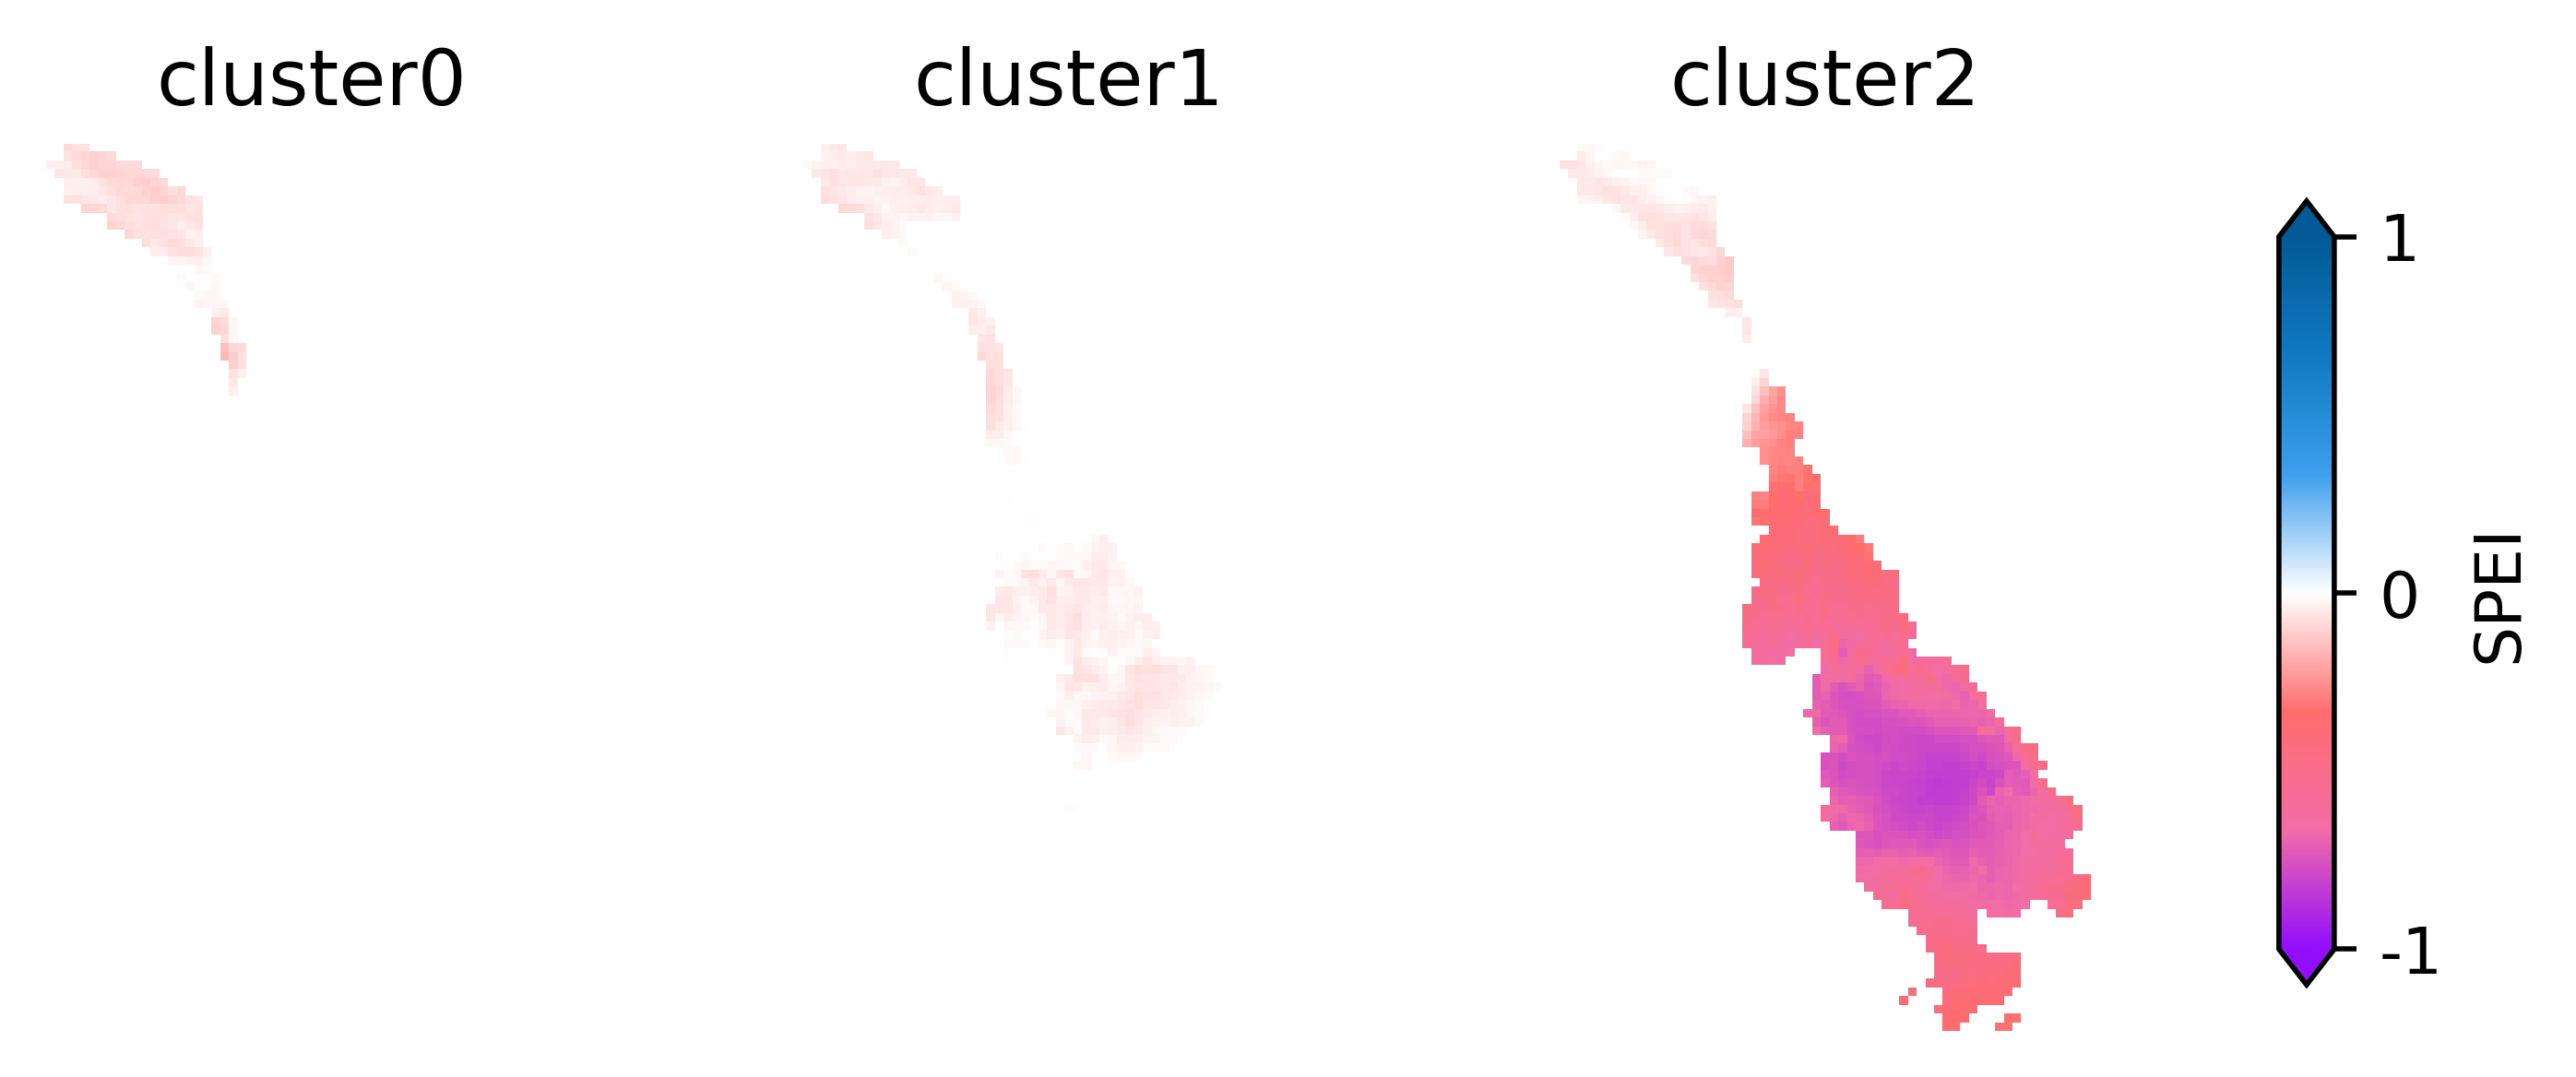

In [56]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(6, 2.5), dpi=500)
images = []

namessperc_on = ['cluster0', 'cluster1', 'cluster2',]
cluster_spei_0 = [spei0_0,spei1_0,spei2_0]

for i, (qt, subplot, name) in enumerate(zip(cluster_spei_0, ax.flat, namessperc_on)):
    im = subplot.imshow(qt, cmap=cmap5.reversed(), interpolation='nearest',vmin=-1,vmax=1)
    images.append(im)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_frame_on(False)
    ax[-1,].axis('off')
    subplot.set_title(name)

cax = fig.add_axes([0.95, 0.15, 0.02, 0.68])
cbar = plt.colorbar(im, cax=cax, extend='both')
cbar.set_ticks([-1,0,1])
cbar.set_ticklabels(['-1','0','1'])
cbar.set_label('SPEI')

# plt.savefig('cluster_spei.pdf')
plt.show()

# Early mete condation 

In [57]:
dspet_dry

<xarray.Dataset>
Dimensions:  (time: 1638, lat: 102, lon: 61)
Coordinates:
  * lon      (lon) float32 93.75 94.0 94.25 94.5 ... 108.0 108.2 108.5 108.8
  * lat      (lat) float32 33.75 33.5 33.25 33.0 32.75 ... 9.5 9.25 9.0 8.75 8.5
  * time     (time) datetime64[ns] 1960-01-07 1960-01-14 ... 2022-12-31
Data variables:
    pev      (time, lat, lon) float64 nan nan 5.733 5.365 ... nan nan nan nan

In [58]:
ds_nf = xr.open_dataset('mete_week/nflux/weekly_nflux.nc')
ds_ef = xr.open_dataset('mete_week/eflux/weekly_eflux.nc')
ds_gph = xr.open_dataset('mete_week/GPH/weekly_GPH.nc')
ds_sst = xr.open_dataset('mete_week/SST/weekly_SST.nc')

In [59]:
sst = ds_sst.sst.values
gph = ds_gph.z.values
nf = ds_nf['p72.162'].values
ef = ds_ef['p71.162'].values

In [60]:
sst_m = np.nanmean(sst,axis=0)
gph_m = np.nanmean(gph,axis=0)
nf_m = np.nanmean(nf,axis=0)
ef_m = np.nanmean(ef,axis=0)

In [61]:
names = locals()
for i in range(0,3):
    names['sst_onset'+str(i)]=np.nanmean(sst[df[df['pred_result']==i].index.tolist()],axis=0) - sst_m
    names['gph_onset'+str(i)]=np.nanmean(gph[df[df['pred_result']==i].index.tolist()],axis=0) - gph_m
    names['nf_onset'+str(i)]=np.nanmean(nf[df[df['pred_result']==i].index.tolist()],axis=0) - nf_m
    names['ef_onset'+str(i)]=np.nanmean(ef[df[df['pred_result']==i].index.tolist()],axis=0) - ef_m
    
    index_lag1 = [index - 1 for index in df[df['pred_result'] == i].index.tolist()]
    names['sst_lag1'+str(i)]=np.nanmean(sst[index_lag1],axis=0) - sst_m
    names['gph_lag1'+str(i)]=np.nanmean(gph[index_lag1],axis=0) - gph_m
    names['nf_lag1'+str(i)]=np.nanmean(nf[index_lag1],axis=0) - nf_m
    names['ef_lag1'+str(i)]=np.nanmean(ef[index_lag1],axis=0) - ef_m
    names['spei_lag1'+str(i)]=np.nanmean(spei[index_lag1],axis=0)
    names['spei_lag1'+str(i)] = np.where(np.array(names['spei_lag1'+str(i)])>0, np.nan, names['spei_lag1'+str(i)])
    
    index_lag2 = [index - 2 for index in df[df['pred_result'] == i].index.tolist()]
    names['sst_lag2'+str(i)]=np.nanmean(sst[index_lag2],axis=0) - sst_m
    names['gph_lag2'+str(i)]=np.nanmean(gph[index_lag2],axis=0) - gph_m
    names['nf_lag2'+str(i)]=np.nanmean(nf[index_lag2],axis=0) - nf_m
    names['ef_lag2'+str(i)]=np.nanmean(ef[index_lag2],axis=0) - ef_m
    names['spei_lag2'+str(i)]=np.nanmean(spei[index_lag2],axis=0)
    names['spei_lag2'+str(i)] = np.where(np.array(names['spei_lag2'+str(i)])>0, np.nan, names['spei_lag2'+str(i)])

    
    index_after1 = [index + 1 for index in df[df['pred_result'] == i].index.tolist()]
    index_after1 = index_after1[:-2]
    names['sst_after1'+str(i)]=np.nanmean(sst[index_after1],axis=0) - sst_m
    names['gph_after1'+str(i)]=np.nanmean(gph[index_after1],axis=0) - gph_m
    names['nf_after1'+str(i)]=np.nanmean(nf[index_after1],axis=0) - nf_m
    names['ef_after1'+str(i)]=np.nanmean(ef[index_after1],axis=0) - ef_m
    names['spei_after1'+str(i)]=np.nanmean(spei[index_after1],axis=0)
    names['spei_after1'+str(i)] = np.where(np.array(names['spei_after1'+str(i)]) > 0, np.nan, names['spei_after1'+str(i)])


In [62]:
clist7=['#ffffff','#ff6d6d','#f26ca7','#920efc']
cmap7 = LinearSegmentedColormap.from_list('chaos',clist7)

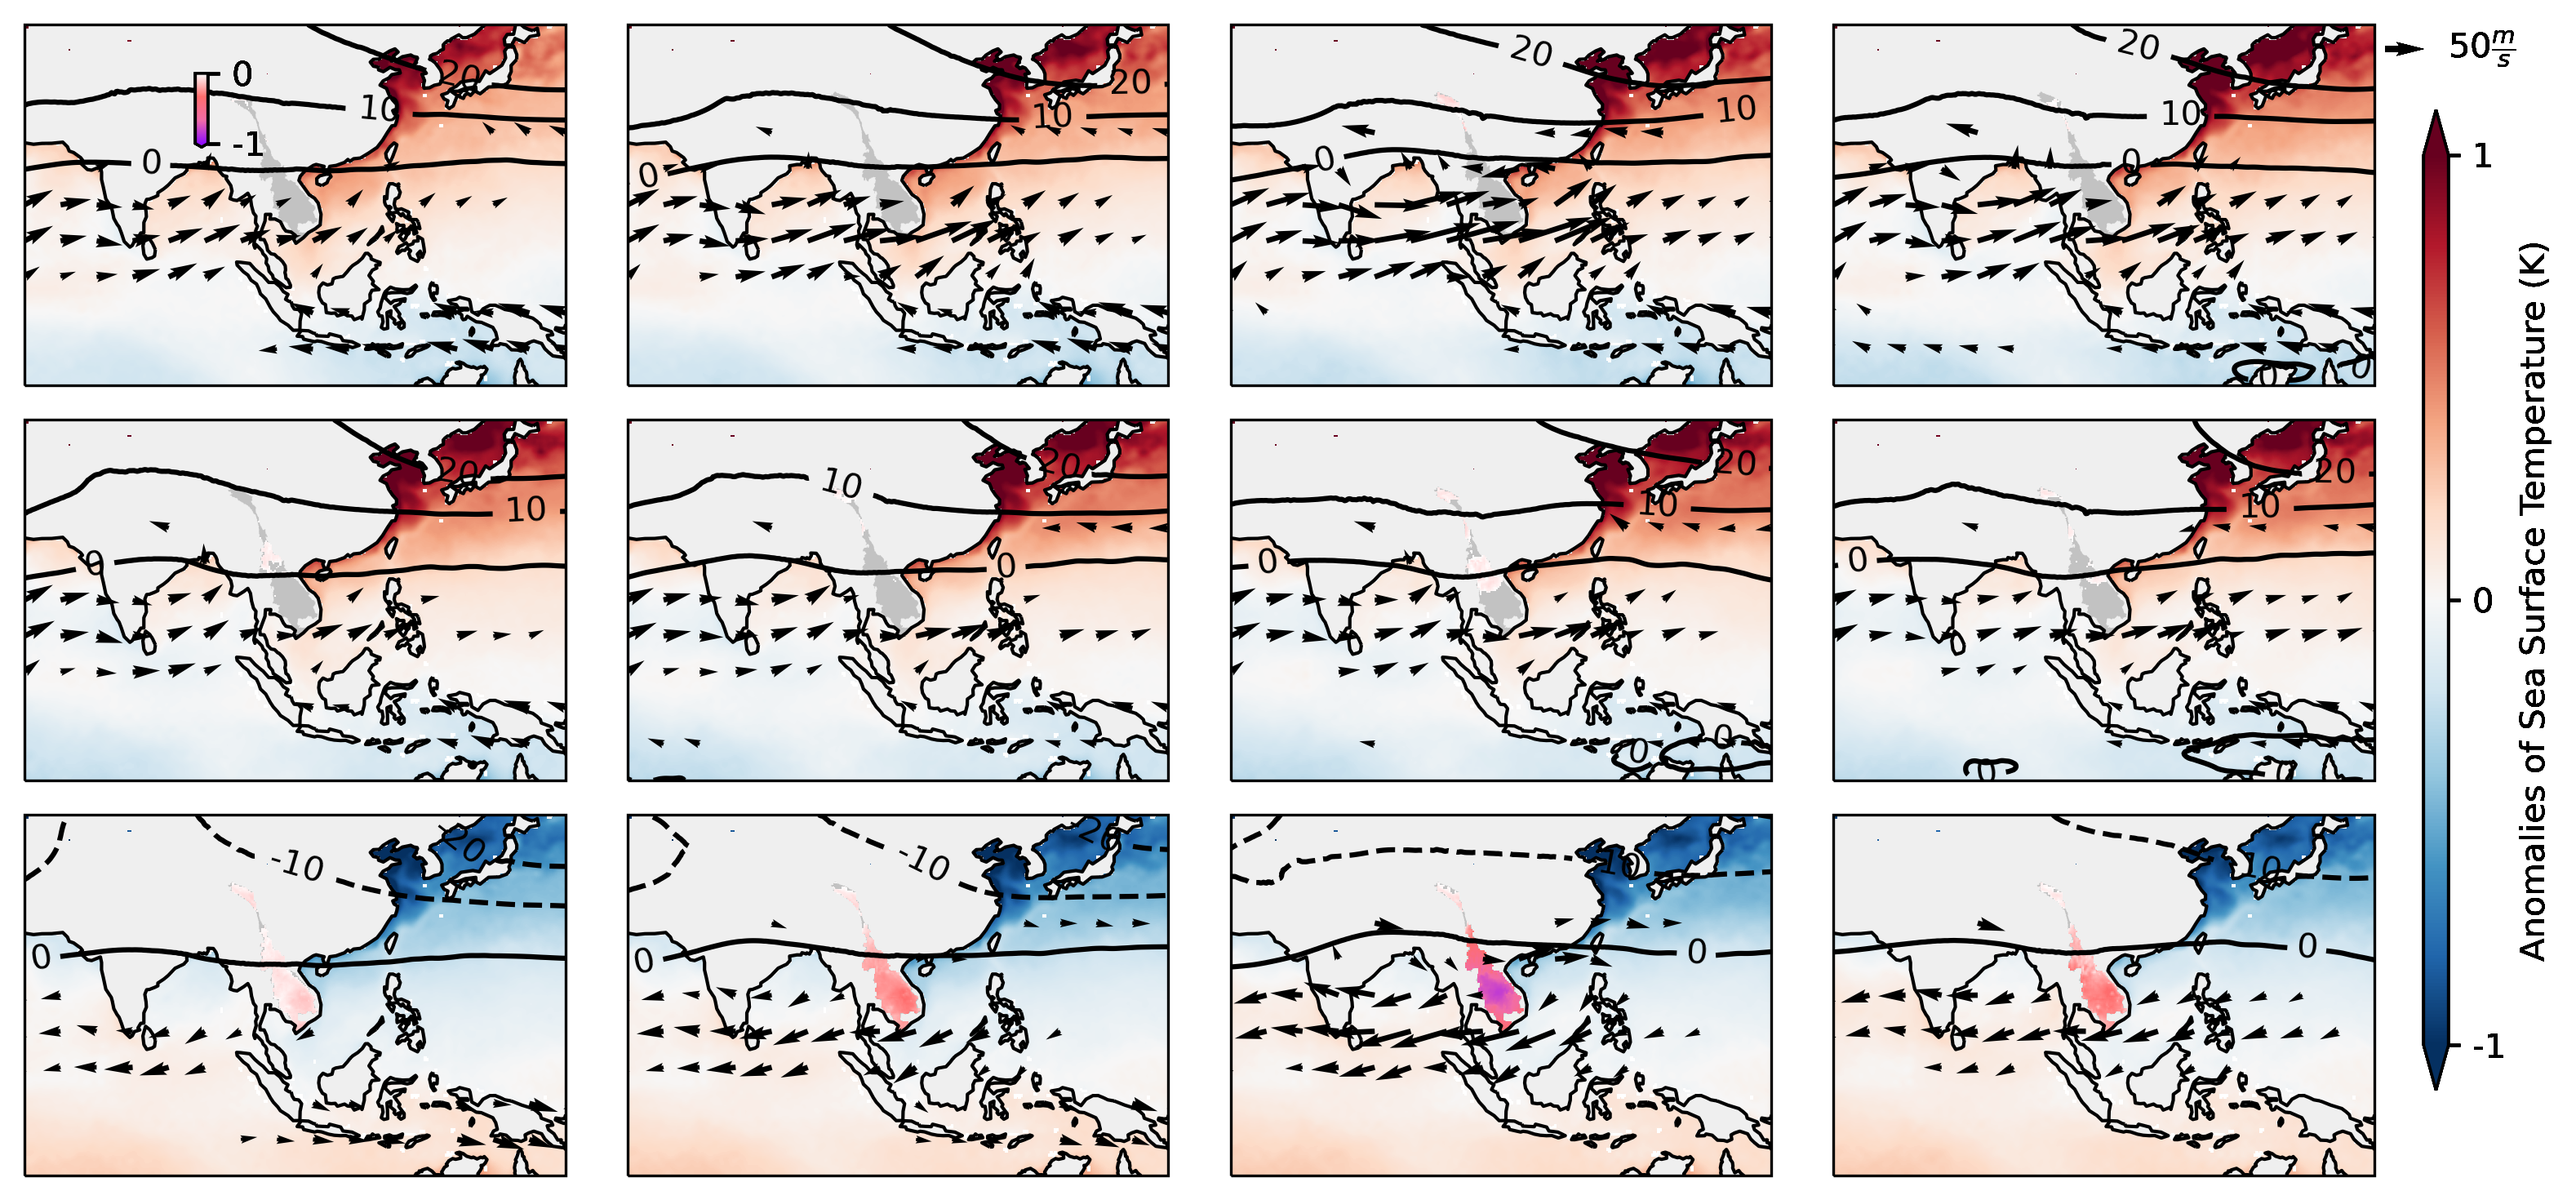

In [63]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

lon_r = np.linspace(93.75, 108.75, 61)
lat_r = np.linspace(33.75, 8.5, 102)

lon = np.linspace(60, 150, 361)
lat = np.linspace(45, -15, 241)
g = 9.8
fig, axes = plt.subplots(nrows=3,ncols=4,figsize=(10,5),dpi=300,subplot_kw={'projection': ccrs.PlateCarree()})
ssstt = [sst_lag20,sst_lag10,sst_onset0,sst_after10,sst_lag21,sst_lag11,sst_onset1,sst_after11,sst_lag22,sst_lag12,sst_onset2,sst_after12,]
gphhh = [gph_lag20/g,gph_lag10/g,gph_onset0/g,gph_after10/g,gph_lag21/g,gph_lag11/g,gph_onset1/g,gph_after11/g,gph_lag22/g,gph_lag12/g,gph_onset2/g,gph_after12/g,]
efff = [ef_lag20,ef_lag10,ef_onset0,ef_after10,ef_lag21,ef_lag11,ef_onset1,ef_after11,ef_lag22,ef_lag12,ef_onset2,ef_after12,]
nfff = [nf_lag20,nf_lag10,nf_onset0,nf_after10,nf_lag21,nf_lag11,nf_onset1,nf_after11,nf_lag22,nf_lag12,nf_onset2,nf_after12,]
cluster_spei_0 = [spei_lag20,spei_lag10,spei0_0,spei_after10,spei_lag21,spei_lag11,spei1_0,spei_after11,spei_lag22,spei_lag12,spei2_0,spei_after12,]
clist=['#000000','#000000','#000000']
newcmp = LinearSegmentedColormap.from_list('chaos',clist)
for i, (ax,sstt,gphh,eff,nff,spei_00) in enumerate(zip(axes.flat,ssstt,gphhh,efff,nfff,cluster_spei_0)):
    projection = ccrs.PlateCarree()
    uv = np.sqrt(eff**2+nff**2)
    uv_masked = np.ma.masked_array(uv)
    uv_masked[uv_masked<20] = np.ma.masked

    extent = [60, 150, -11.011, 35.384]
    ax.set_extent(extent)
    ax.coastlines()
    
    ax = stack_shp(ax, shp,facecolor='#c2c2c2',edgecolor=None)
    im_sst = ax.imshow(sstt, extent=[60, 150, -15, 45], transform=projection,
                   vmin=-1,vmax=1, cmap='RdBu_r')
    
    cax = fig.add_axes([1.0, 0.10, 0.01, 0.8]) 
    cbar_sst = plt.colorbar(im_sst, cax=cax, extend='both')
    cbar_sst.set_label('Anomalies of Sea Surface Temperature (K)')
    cbar_sst.set_ticks([-1,0,1,])
    cbar_sst.set_ticklabels(['-1','0','1'])
    
    im_spei = ax.imshow(spei_00, extent=[93.75, 108.75, 8.5, 33.75], transform=projection,
                 vmin=-1,vmax=1, cmap=cmap7.reversed())
    im_spei.set_clim(vmin=-1, vmax=0)
    cax = fig.add_axes([0.09, 0.87, 0.005, 0.06]) 
    cbar_spei = plt.colorbar(im_spei, cax=cax, extend='min')
    # cbar_spei.set_label('SPEI')
    cbar_spei.set_ticks([-1,0])
    cbar_spei.set_ticklabels(['-1','0',])
    
    ax.add_feature(cfeature.LAND, facecolor='#efefef',)
    gaps = 24
    Q = ax.quiver(lon[::gaps], lat[::gaps], eff[::gaps,::gaps], nff[::gaps,::gaps],
                  uv_masked[::gaps,::gaps],width=0.01,scale=700, cmap=newcmp,
                  headwidth=2.5)
    qk = ax.quiverkey(Q, 1, 0.95, 50, r'$50 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')
    CL = ax.contour(lon, lat, gphh, colors='k',transform=ccrs.PlateCarree(),
                    levels=np.arange(-20,21,10),ls='dotted')
    ax.clabel(CL,fontsize=10,fmt='%.0f')
plt.tight_layout()
plt.show()


In [64]:
cluster_year = df['pred_result'].values.reshape(63,52)
cluster_week = cluster_year.transpose(1,0)

clu_we = []
for i in range(0,52):
    for j in range(0,3):
        clu_we.append(np.count_nonzero(cluster_week[i]==j))

clu_we = np.array(clu_we).reshape(52,3).transpose(1,0)

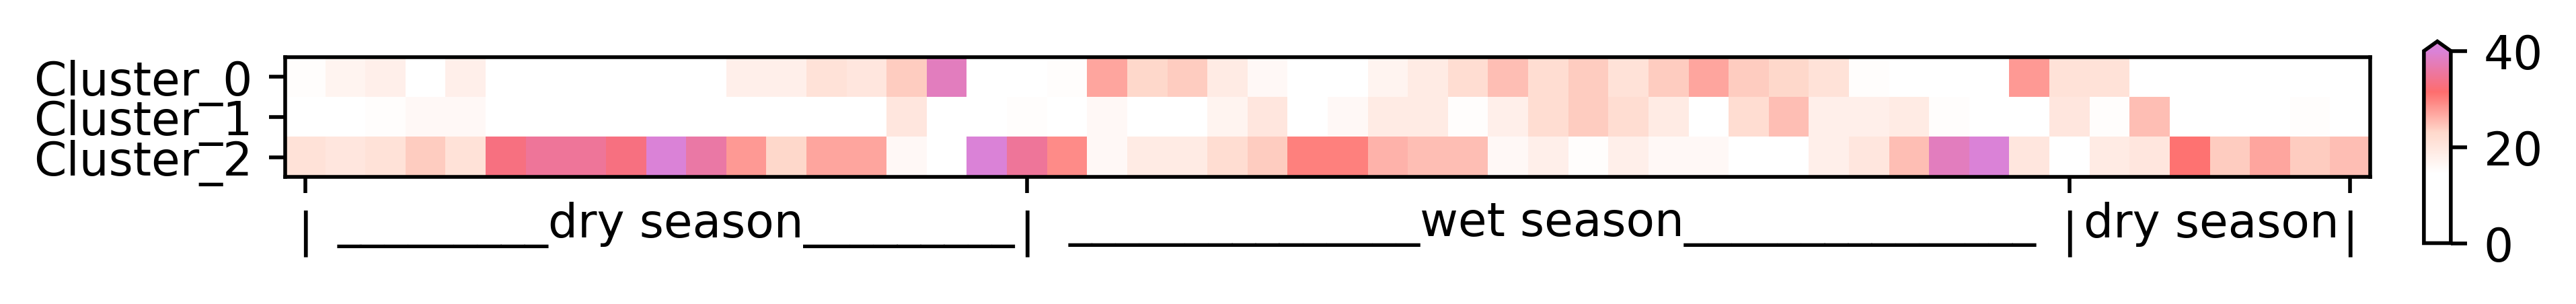

In [65]:
clist6=['#ffffff','#ffffff','#ffd9cc','#fe6d6d','#da82d7']
cmap6 = LinearSegmentedColormap.from_list('chaos',clist6)

fig, ax = plt.subplots( figsize=(8,5), dpi=500)
im = ax.imshow(clu_we, cmap=cmap6,vmax=40)
cax = fig.add_axes([0.92, 0.42, 0.01, 0.12])
cbar = plt.colorbar(im, cax=cax, extend='max')
cbar.set_ticks([0,20,40])
cbar.set_ticklabels(['0','20','40',])

ax.set_xticks([0,18,44,51])  
ax.set_xticklabels(['|', '|','|','|',])  

ax.set_yticks([0,1,2])  
ax.set_yticklabels(['Cluster_0', 'Cluster_1','Cluster_2'])  
ax.text(0.35, -0.2, '_________dry season_________', ha='right', va='top', transform=ax.transAxes)
ax.text(0.84, -0.2, '_______________wet season_______________', ha='right', va='top', transform=ax.transAxes)
ax.text(0.985, -0.2, 'dry season', ha='right', va='top', transform=ax.transAxes)
plt.show()

In [66]:
cluster_year.shape

(63, 52)

In [67]:
clu_ye = []
for i in range(0,63):
    for j in range(0,3):
        clu_ye.append(np.count_nonzero(cluster_year[i]==j))
clu_ye = np.array(clu_ye).reshape(63,3)

In [68]:
clu_ye.shape

(63, 3)

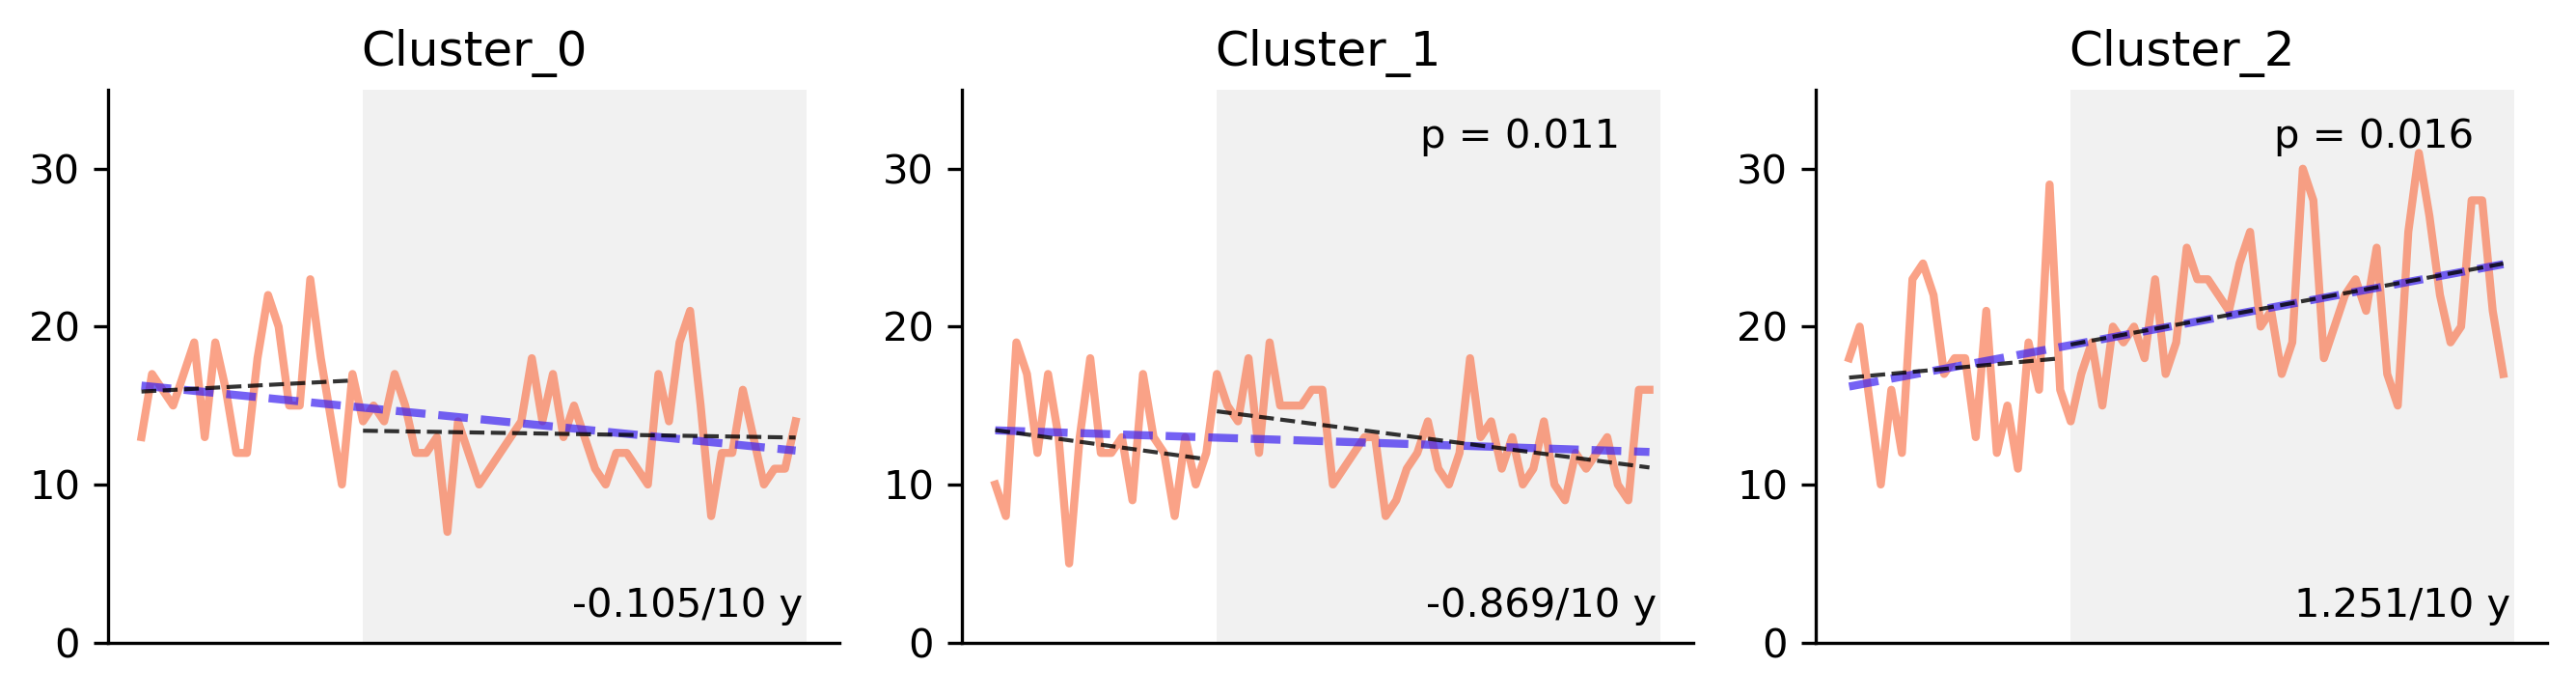

In [69]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

clu_year = [clu_ye[:,0],clu_ye[:,1],clu_ye[:,2]]
namess = ['Cluster_0', 'Cluster_1', 'Cluster_2']
x = np.arange(63)
x1 = np.arange(0,21)
x2 = np.arange(21,63)
fig, axes = plt.subplots(1, 3, figsize=(9, 2.5), dpi=300)

for i, ax in enumerate(axes.flat):
    slope, intercept, r_value, p_value, std_err = linregress(x, clu_year[i])
    slope1, intercept1, r_value1, p_value1, std_err1 = linregress(x1, clu_year[i][0:21])
    slope2, intercept2, r_value2, p_value2, std_err2 = linregress(x2, clu_year[i][21:63])
    ax.plot(clu_year[i],color="#f97b54",lw=2,alpha=0.7)
    ax.set_title(namess[i])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xticks([0, 20, 40, 60])  
    ax.set_xticklabels(['1960',  '1980', '2000', '2020'])  
    ax.set_yticks([0,10,20,30])  
    ax.set_yticklabels(['0','10','20','30'])  
    ax.plot(x, intercept + slope * x, color='#3a20f0', linestyle='--',lw= 2,alpha=0.7)
    ax.plot(x1, intercept1 + slope1 * x1, color='k', linestyle='--',lw= 1,alpha=0.8)
    ax.plot(x2, intercept2 + slope2 * x2, color='k', linestyle='--',lw= 1,alpha=0.8)
    ax.axvspan(21, 63, facecolor='lightgray', alpha=0.3)
    ax.set_ylim(0, 35)
    ax.text(0.95, 0.1, f'{slope2*10:.3f}/10 y', ha='right', va='top', transform=ax.transAxes)
    ax.xaxis.set_ticks_position('bottom')  
    ax.yaxis.set_ticks_position('left') 
    if p_value2 < 0.05:
        ax.text(0.90, 0.95, f'p = {p_value2:.3f}', ha='right', va='top', transform=ax.transAxes)
    if i == 0:
        ax.set_xticks([])
    if i == 1:
        ax.set_xticks([])
    if i == 2:
        ax.set_xticks([])

        
plt.tight_layout()
plt.show()